# Crack orientation with crack parallel stress $\sigma_{\mathrm{z}}$

In [1]:
import numpy as np
import sympy as sp


tau_fps, sigma_x, sigma_z = sp.symbols(r'\tau_\mathrm{fps}, sigma_x, sigma_z')
f_ct = sp.Symbol(r'f_ct')


sigma_xz = sp.Matrix([[sigma_x, tau_fps],
                     [tau_fps, sigma_z]])
sigma_xz

Matrix([
[          sigma_x, \tau_\mathrm{fps}],
[\tau_\mathrm{fps},           sigma_z]])

<img src="beam_crack_prop_sig_z.png" width="400"/> 

With the inclusion of the crack parallel stress, the stress tensor at the tip of the crack will be given as:
\begin{align}
\bar{\sigma}_{ij} = 
\left[
\begin{array}{cc}
\sigma_x & \tau_{\mathrm{fpz}} \\
\tau_{\mathrm{fpz}} & \sigma_z 
\end{array}
\right]
\label{eq: sigma_tip}
\end{align}
where the crack parallel stress $\sigma_z$, $\tau_\mathrm{fpz}$ will be obtained by the cantilever action and the parabolic profile of shear stress along the height of the cross section. 

Based on this stress tensor, the orientation of the crack can be attained by using principal stress directions:
\begin{align}
    \bar{\sigma}_{ij} = PDP^{-1}
    \label{eq: barsigma}
\end{align}

In [2]:
P_xz, D_xz = sigma_xz.diagonalize()
P_xz

Matrix([
[(sigma_x - sigma_z - sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2))/(2*\tau_\mathrm{fps}), (sigma_x - sigma_z + sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2))/(2*\tau_\mathrm{fps})],
[                                                                                                                     1,                                                                                                                      1]])

In [3]:
D_xz

Matrix([
[sigma_x/2 + sigma_z/2 - sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2)/2,                                                                                                    0],
[                                                                                                   0, sigma_x/2 + sigma_z/2 + sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2)/2]])

By assuming the tensile strength of concrete as the governing parameter for $\sigma_x$ and by equating $\sigma_x = f_{\mathrm{ct}}$, the solution for the horizontal stress can be evaluated based on the known $\sigma_z, \tau_{\mathrm{fpz}}$ as:

In [4]:
subs_sigma_x = sp.solve({D_xz[0,0] - f_ct}, {sigma_x})[0]
subs_sigma_x

{sigma_x: (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z)}

In [5]:
sigma_xf = sigma_xz.subs(subs_sigma_x)
sigma_xf

Matrix([
[(-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z), \tau_\mathrm{fps}],
[                                                \tau_\mathrm{fps},           sigma_z]])

In [6]:
P_xf = P_xz.subs(subs_sigma_x)
D_xf = D_xz.subs(subs_sigma_x)
P_xf

Matrix([
[(-sigma_z - sqrt(4*\tau_\mathrm{fps}**2 + sigma_z**2 - 2*sigma_z*(-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z) + (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)**2/(f_ct - sigma_z)**2) + (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z))/(2*\tau_\mathrm{fps}), (-sigma_z + sqrt(4*\tau_\mathrm{fps}**2 + sigma_z**2 - 2*sigma_z*(-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z) + (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)**2/(f_ct - sigma_z)**2) + (-\tau_\mathrm{fps}**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z))/(2*\tau_\mathrm{fps})],
[                                                                                                                                                                                                                                                                                                       1,                                                                                               

In [7]:
theta_xz = sp.atan( sp.simplify(-P_xf[0,0] / P_xf[1,0]))
theta_xz

atan((\tau_\mathrm{fps}**2 - f_ct**2 + f_ct*sigma_z + (f_ct - sigma_z)*(sigma_z + sqrt((2*sigma_z*(f_ct - sigma_z)*(\tau_\mathrm{fps}**2 - f_ct**2 + f_ct*sigma_z) + (4*\tau_\mathrm{fps}**2 + sigma_z**2)*(f_ct - sigma_z)**2 + (\tau_\mathrm{fps}**2 - f_ct**2 + f_ct*sigma_z)**2)/(f_ct - sigma_z)**2)))/(2*\tau_\mathrm{fps}*(f_ct - sigma_z)))

In [8]:
get_theta_xz = sp.lambdify((tau_fps, f_ct, sigma_z), theta_xz)
get_theta_xz

<function _lambdifygenerated(Dummy_34, f_ct, sigma_z)>

In [9]:
get_sigma_x_val = sp.lambdify((tau_fps, f_ct, sigma_z),sigma_xf[0,0])
get_sigma_x_val

<function _lambdifygenerated(Dummy_35, f_ct, sigma_z)>

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (arctan((1/2)*(Dummy_34**2 - f_ct**2 + f_ct*sigma_z + (f_ct - sigma_z)*(sigma_z + sqrt((2*sigma_z*(f_ct - sigma_z)*(Dummy_34**2 - f_ct**2 + f_ct*sigma_z) + (4*Dummy_34**2 + sigma_z**2)*(f_ct - sigma_z)**2 + (Dummy_34**2 - f_ct**2 + f_ct*sigma_z)**2)/(f_ct - sigma_z)**2)))/(Dummy_34*(f_ct - sigma_z))))
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in multiply
  return (arctan((1/2)*(Dummy_34**2 - f_ct**2 + f_ct*sigma_z + (f_ct - sigma_z)*(sigma_z + sqrt((2*sigma_z*(f_ct - sigma_z)*(Dummy_34**2 - f_ct**2 + f_ct*sigma_z) + (4*Dummy_34**2 + sigma_z**2)*(f_ct - sigma_z)**2 + (Dummy_34**2 - f_ct**2 + f_ct*sigma_z)**2)/(f_ct - sigma_z)**2)))/(Dummy_34*(f_ct - sigma_z))))
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in true_divide
  return ((-Dummy_35**2 + f_ct**2 - f_ct*sigma_z)/(f_ct - sigma_z))


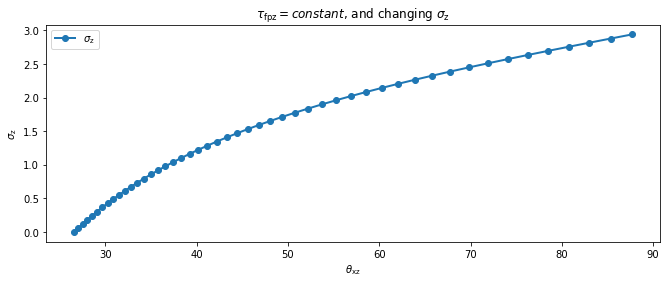

In [32]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
eta = 0.5
tau_xx = eta * f_ct_val
sigma_z = np.linspace(0, 3, 50)
theta_xz = get_theta_xz(tau_xx, f_ct_val, sigma_z)
sigma_x = get_sigma_x_val(tau_xx, f_ct_val, sigma_z)

ax1.plot(theta_xz * 180/ np.pi,  sigma_z, 'o-', lw= 2, label = r'$\sigma_{\mathrm{z}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'$\tau_{\mathrm{fpz}} = constant$, and changing $\sigma_{\mathrm{z}}$')
ax1.legend()
#plt.savefig("D:\Shear zones\Python plots\Angle of orientation with crack parallel stress.pdf")

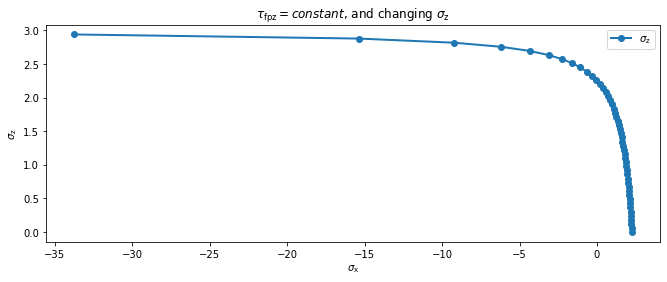

In [33]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
ax1.plot(sigma_x,  sigma_z, 'o-', lw= 2, label = r'$\sigma_{\mathrm{z}}}$')
ax1.set_xlabel(r'$\sigma_{\mathrm{x}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'$\tau_{\mathrm{fpz}} = constant$, and changing $\sigma_{\mathrm{z}}$')
ax1.legend()

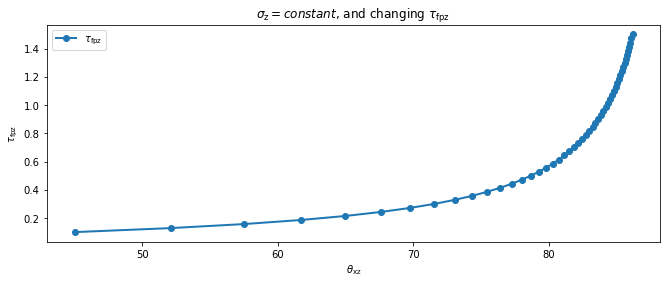

In [36]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
sigma_z = 2.9
tau_xx = np.linspace(0.1, 1.5, 50)
theta_xz = get_theta_xz(tau_xx, f_ct_val, sigma_z)
sigma_x = get_sigma_x_val(tau_xx, f_ct_val, sigma_z)

ax1.plot(theta_xz * 180/ np.pi,  tau_xx, 'o-', lw= 2, label = r'$\tau_{\mathrm{fpz}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\tau_{\mathrm{fpz}}$');
ax1.set_title(r'$\sigma_{\mathrm{z}} = constant$, and changing $\tau_{\mathrm{fpz}}$')
ax1.legend()

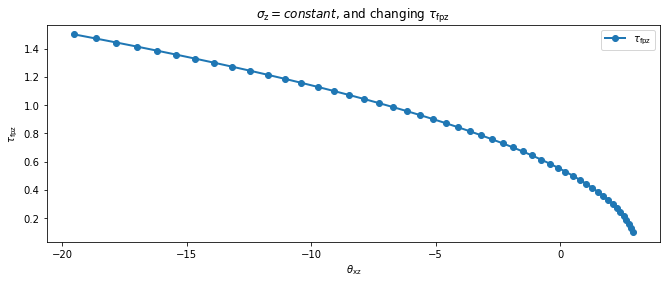

In [37]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

ax1.plot(sigma_x,  tau_xx, 'o-', lw= 2, label = r'$\tau_{\mathrm{fpz}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\tau_{\mathrm{fpz}}$');
ax1.set_title(r'$\sigma_{\mathrm{z}} = constant$, and changing $\tau_{\mathrm{fpz}}$')
ax1.legend()

In [38]:
f_ct_val = 3
tau_fpz_num = 10
tau_fpz = np.linspace(0.1,1.5, tau_fpz_num)
#eta = 0.2
#tau_xx = eta * f_ct_val
sig_z_num = 10
sigma_z = np.linspace(0, 2.9, sig_z_num)
theta = np.zeros([tau_fpz_num, sig_z_num])
for j in  range(len(sigma_z)):
    #print('sigma_z =', sigma_z[j])
    for i in range(len(tau_fpz)):
        #print('tau_fpz =', tau_fpz[i])
        theta_xz = get_theta_xz(tau_fpz[i], f_ct_val, sigma_z[j])
        theta[j, i] = theta_xz
print(theta)

[[0.033321   0.08498003 0.13618876 0.18668933 0.23624526 0.28464723
  0.331717   0.37730946 0.42131286 0.46364761]
 [0.03732705 0.09514752 0.15233751 0.2085416  0.26344109 0.31676306
  0.36828556 0.41783927 0.46530598 0.51061466]
 [0.04242735 0.1080679  0.17278795 0.23608012 0.29750424 0.35670135
  0.41339981 0.46741407 0.51863798 0.56703437]
 [0.04914073 0.12502749 0.1994964  0.27179216 0.34129204 0.40752683
  0.47018346 0.52909312 0.58420995 0.63558571]
 [0.05837516 0.14825483 0.23579056 0.31980124 0.39939302 0.47398316
  0.54327936 0.607231   0.66596924 0.71974869]
 [0.07187597 0.18196469 0.28778304 0.38738385 0.47951929 0.56361719
  0.63965004 0.70796708 0.76913943 0.82384075]
 [0.09347678 0.23515097 0.36787167 0.48833395 0.59517951 0.68855916
  0.76952648 0.83953241 0.90009985 0.9526521 ]
 [0.13352905 0.33067889 0.50456044 0.65062688 0.77024781 0.86740561
  0.94649007 1.01135738 1.06510232 1.11011607]
 [0.23255694 0.54428048 0.77206562 0.93043986 1.04176586 1.12245365
  1.18289637

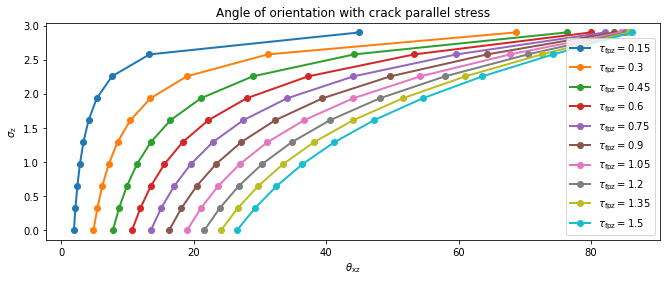

In [42]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
ax1.plot(theta[:,0] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.15}$')
ax1.plot(theta[:,1] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.3}$')
ax1.plot(theta[:,2] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.45}$')
ax1.plot(theta[:,3] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.6}$')
ax1.plot(theta[:,4] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.75}$')
ax1.plot(theta[:,5] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.9}$')
ax1.plot(theta[:,6] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.05}$')
ax1.plot(theta[:,7] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.2}$')
ax1.plot(theta[:,8] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.35}$')
ax1.plot(theta[:,9] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.5}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'Angle of orientation with crack parallel stress')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Angle of orientation with crack parallel stress_sig_x.pdf")